<a href="https://colab.research.google.com/github/Rajatkumar0662/Data_Science/blob/main/Data_Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploratory Analysis

To make it work download 'data.csv' and store to specified location mentioned below i.e, make a folder in your Google Drive as 'Data_Science' and move the file 'data.csv' in that folder, make sure the file_name should be 'data.csv'.

Notes: Make sure in this we have used clean data.


Clean Data stored in location mentioned below:
> Location: Data_Science/data.csv

> File_name: data.csv



## Reading data as dataframe

In [1]:
from google.colab import drive

# Accessing My Google Drive
# will attempt to give access to your individual drives
drive.mount('/content/drive')
# On Success return with - Mounted at /content/drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
path = '/content/drive/MyDrive/Data_Science/data.csv'
df = pd.read_csv(path)
df.head()

,Day,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),Maximum rain per minute,Maximum temperature (°F),Minimum temperature (°F),Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F)
0,1/01/2009,37.8,35,12.7,29.7,26.4,36.8,274,0.0,0.0,0.0,40.1,34.5,44,27,29.762,29.596,41.4,59.0,40.1
1,2/01/2009,43.2,32,14.7,29.5,12.8,18.0,240,0.0,0.0,0.0,52.8,37.5,43,16,29.669,29.268,35.7,51.0,52.8
2,3/01/2009,25.7,60,12.7,29.7,8.3,12.2,290,0.0,0.0,0.0,41.2,6.7,89,35,30.232,29.260,25.3,38.0,41.2
3,4/01/2009,9.3,67,0.1,30.4,2.9,4.5,47,0.0,0.0,0.0,19.4,-0.0,79,35,30.566,30.227,12.7,20.0,32.0
4,5/01/2009,23.5,30,-5.3,29.9,16.7,23.1,265,0.0,0.0,0.0,30.3,15.1,56,13,30.233,29.568,38.0,53.0,32.0


In [4]:
# Non null value represents clean data
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3280 entries, 0 to 3279
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Day                       3280 non-null   object 
 1   Average temperature (°F)  3280 non-null   float64
 2   Average humidity (%)      3280 non-null   int64  
 3   Average dewpoint (°F)     3280 non-null   float64
 4   Average barometer (in)    3280 non-null   float64
 5   Average windspeed (mph)   3280 non-null   float64
 6   Average gustspeed (mph)   3280 non-null   float64
 7   Average direction (°deg)  3280 non-null   int64  
 8   Rainfall for month (in)   3280 non-null   float64
 9   Rainfall for year (in)    3280 non-null   float64
 10  Maximum rain per minute   3280 non-null   float64
 11  Maximum temperature (°F)  3280 non-null   float64
 12  Minimum temperature (°F)  3280 non-null   float64
 13  Maximum humidity (%)      3280 non-null   int64  
 14  Minimum 

## What is the standard deviation of maximum windspeed across all the days

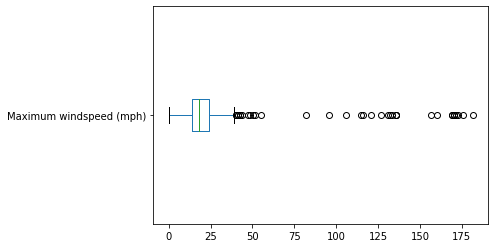

In [5]:
df.boxplot(column='Maximum windspeed (mph)',vert=False,grid=False)

The Above graph shows that value of dataframe['Maximum windspeed (mph)'] is not required above 75(approx.)

In [6]:
df['Maximum windspeed (mph)'].describe()

count    3280.000000
mean       20.059665
std        13.060875
min         0.000000
25%        13.800000
50%        18.400000
75%        24.200000
max       181.700000
Name: Maximum windspeed (mph), dtype: float64

In [7]:
ws_std = df['Maximum windspeed (mph)'].std()
print("ws_std = {:.2f}".format(ws_std))

ws_std = 13.06


## What is the difference between 50th percentile and 75th percentile of average temperature

In [8]:
df['Average temperature (°F)'].describe()

count    3280.000000
mean       45.162896
std        15.188165
min       -12.100000
25%        34.500000
50%        45.900000
75%        58.100000
max        76.300000
Name: Average temperature (°F), dtype: float64

In [9]:
p_range = (df['Average temperature (°F)'].quantile(0.75)-df['Average temperature (°F)'].quantile(0.5)).round(2)
print("p_range = {:.2f}".format(p_range) )

p_range = 12.20


## What is the pearson correlation between average dew point and average temperature

In [10]:
col = ['Average dewpoint (°F)','Average temperature (°F)']
corr = df[col].corr(method='pearson').loc[col[0], col[1]].round(2)
print("corr = {:.2f}".format(corr))

corr = 0.76


## Out of all the available records which month has the lowest average humidity.
    -   Assign your answer as month index, for example if its July index is 7



In [11]:
dew_month = pd.to_datetime((df['Day'].iloc[df['Average humidity (%)'].idxmin()])).month 
print("dew_month = {}".format(dew_month))

dew_month = 1


## Which month has the highest median for maximum_gust_speed out of all the available records. Also find the repective value
    - hint: group by month

In [12]:
df1 = df.loc[:, ['Day', 'Maximum gust speed (mph)']]
df1['Day'] = pd.to_datetime(df1['Day'], format = "%d/%m/%Y")
df1['month'] = df1['Day'].apply(lambda x : x.strftime('%m'))
a = df1.groupby('month').agg({'Maximum gust speed (mph)':np.median}).reset_index()
max_gust_value = a['Maximum gust speed (mph)'].max()
print("max_gust_value = {:.2f}".format(max_gust_value))

max_gust_value = 34.50


In [13]:
max_gust_month = a['month'].iloc[a['Maximum gust speed (mph)'].idxmax()]
print("max_gust_month = {}".format(int(max_gust_month)))

max_gust_month = 2


## Determine the average temperature between the months of March 2010 to May 2012 (including both the months)

In [14]:
start = pd.to_datetime('1/3/2010', format = "%d/%m/%Y")
end = pd.to_datetime('31/5/2012', format = "%d/%m/%Y")
df1 = df.loc[:, ['Day', 'Average temperature (°F)']]
df1['Day'] = pd.to_datetime(df1['Day'], format = "%d/%m/%Y")
mask = (df1['Day']>=start) & (df1['Day']<=end)
df1 = df1.loc[mask]
avg_temp = df1['Average temperature (°F)'].mean()
print("avg_temp = {:.2f}".format(avg_temp))

avg_temp = 45.33


## Find the range of averange temperature on Dec 2010

In [15]:
start = pd.to_datetime('1/12/2010', format = "%d/%m/%Y")
end = pd.to_datetime('31/12/2010', format = "%d/%m/%Y")
f1 = df.loc[:, ['Day', 'Average temperature (°F)']]
df1['Day'] = pd.to_datetime(df1['Day'], format = "%d/%m/%Y")
mask = (df1['Day']>=start) & (df1['Day']<=end)
df1 = df1.loc[mask]
temp_range = df1['Average temperature (°F)'].max() - df1['Average temperature (°F)'].min()
print("temp_range = {:.2f}".format(temp_range))

temp_range = 44.80


## Out of all available records which day has the highest difference between maximum_pressure and minimum_pressure
    - assign the date in string format as 'yyyy-mm-dd'. Make sure you enclose it with
     single quote

In [16]:
df1 = df.loc[:, ['Day','Maximum pressure ','Minimum pressure ']]
df1.Day = pd.DatetimeIndex(df['Day']).strftime("'%Y-%m-%d'")
df1['Diff'] = df['Maximum pressure ']-df['Minimum pressure ']
df1.head()

,Day,Maximum pressure,Minimum pressure,Diff
0,'2009-01-01',29.762,29.596,0.166
1,'2009-02-01',29.669,29.268,0.401
2,'2009-03-01',30.232,29.260,0.972
3,'2009-04-01',30.566,30.227,0.339
4,'2009-05-01',30.233,29.568,0.665


In [17]:
max_p_range_day = df1[df1['Diff'] == df1['Diff'].max()]['Day'].iloc[0]
print("max_p_range_day = ", max_p_range_day)

max_p_range_day =  '2018-03-23'


## How many days falls under median (i.e equal to median value) of barrometer reading.


In [18]:
median_b_days = df[df['Average barometer (in)'] == df['Average barometer (in)'].median()]['Day'].count()
print("median_b_days = {}".format(median_b_days))

median_b_days = 534


## Out of all the available records how many days are within one standard deviation of average temperaturem

In [19]:
mean, std = df['Average temperature (°F)'].mean(), df['Average temperature (°F)'].std()
print(mean, std)
range = list(map(lambda x: round(x,2),[mean-std, mean+std]))
print(range)
num_days_std = df[(df['Average temperature (°F)']>=range[0]) & (df['Average temperature (°F)']<= range[1])]['Day'].count()
print("num_days_std = {}".format(num_days_std))
# num_days_std.describe()

45.16289634146344 15.188164868884023
[29.97, 60.35]
num_days_std = 2092
